# PROBLEM STATEMENT

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:
0 => T-shirt/top 1 => Trouser 2 => Pullover 3 => Dress 4 => Coat 5 => Sandal 6 => Shirt 7 => Sneaker 8 => Bag 9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255

In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random

%matplotlib inline

In [2]:
# dataframes creation for both training and testing datasets 
fashion_train = pd.read_csv('Data/fashion-mnist_train.csv',sep=',')
fashion_test = pd.read_csv('Data/fashion-mnist_test.csv', sep = ',')

In [3]:
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train.shape

(60000, 785)

In [6]:
# Create training and testing arrays
train = np.array(fashion_train, dtype='float32')
test = np.array(fashion_test, dtype='float32')

In [7]:
train.shape

(60000, 785)

In [8]:
train

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], shape=(60000, 785), dtype=float32)

In [9]:
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], shape=(10000, 785), dtype=float32)

Text(0.5, 1.0, 'Trouser')

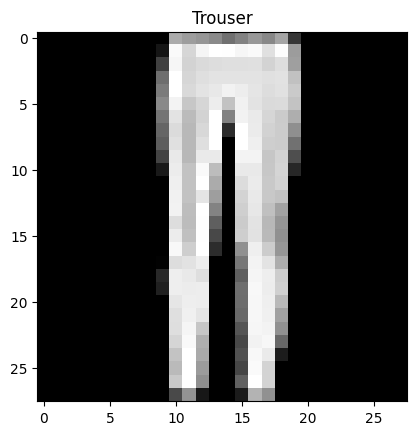

In [10]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow(train[i,1:].reshape((28,28))) # reshape and plot the image

plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image
label_index = fashion_train["label"][i]
plt.title(f"{class_names[label_index]}")


# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [11]:
label = train[i,0]
label

np.float32(1.0)

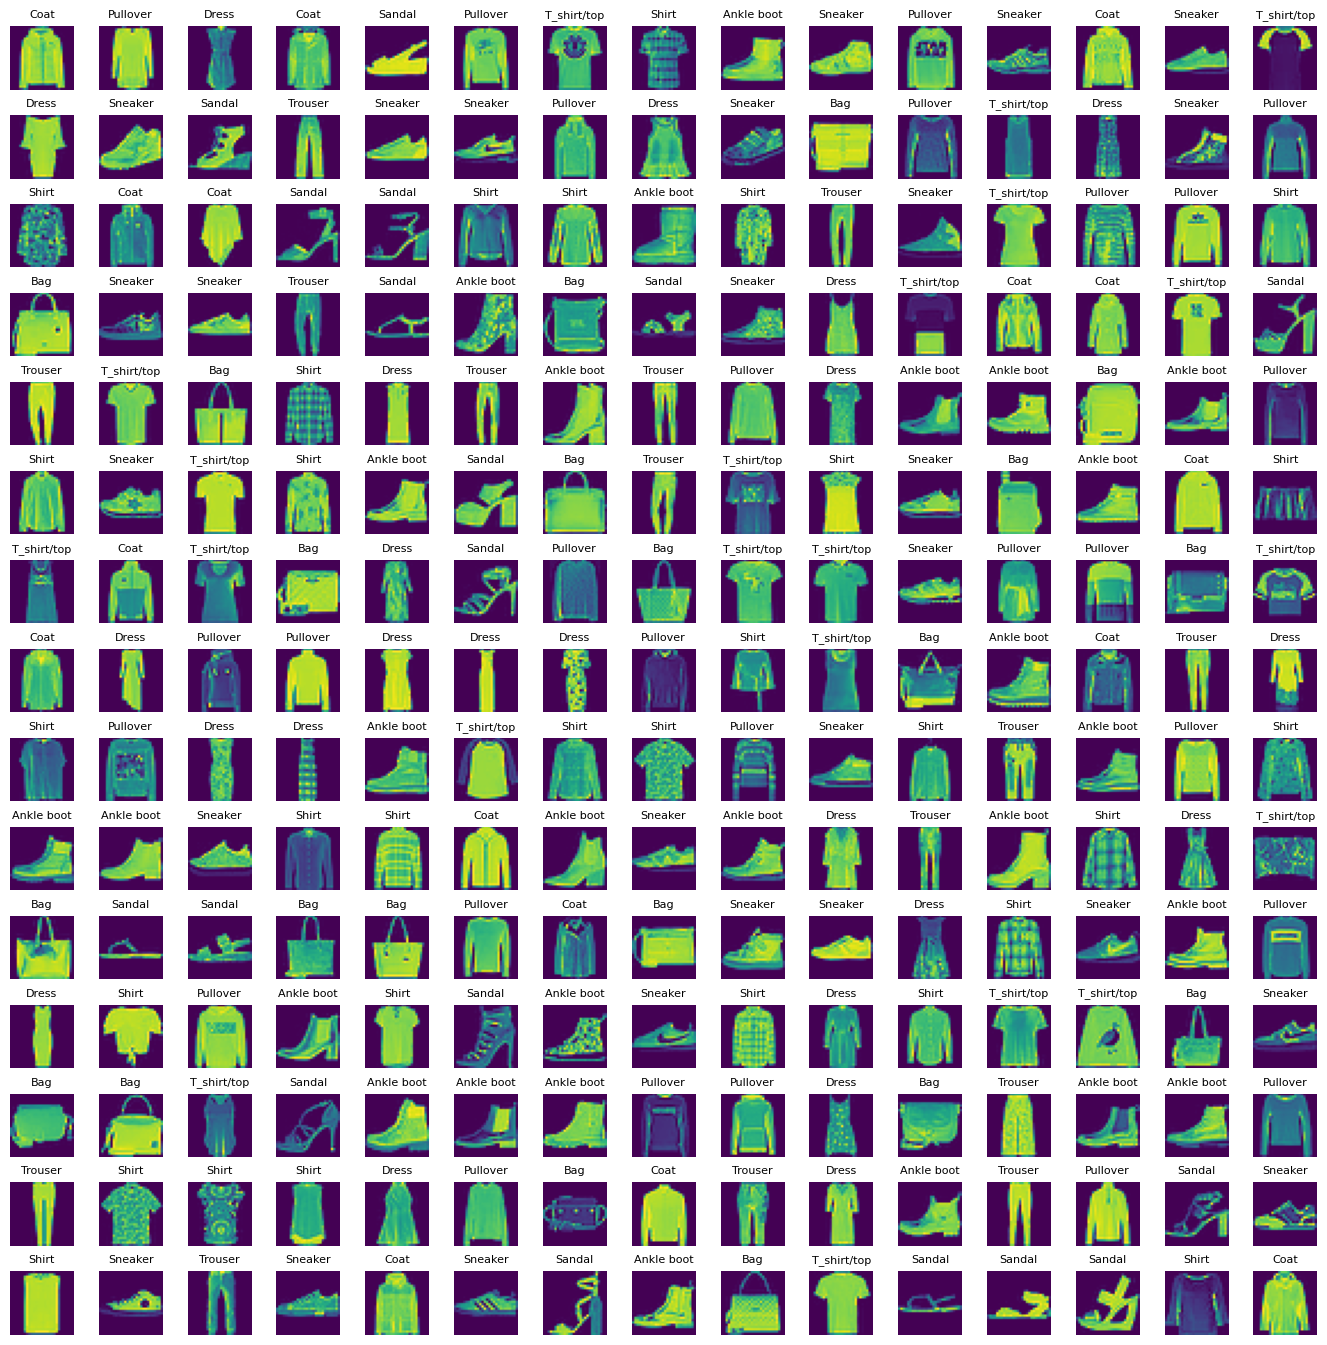

In [12]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    label_index = int(train[index,0])
    axes[i].set_title(class_names[label_index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [13]:
# Prepare the training and testing dataset 
X_train = train[:, 1:] / 255
y_train = train[:, 0]

X_test = test[:, 1:] / 255
y_test = test[:,0]


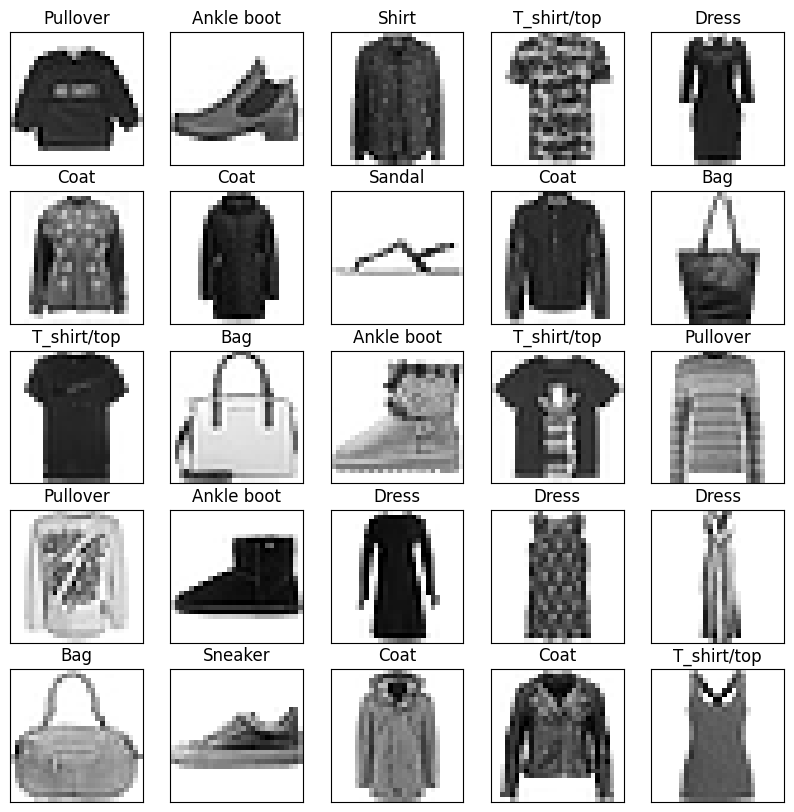

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()
plt.tight_layout()

Text(0.5, 1.0, 'Class distribution in testing set')

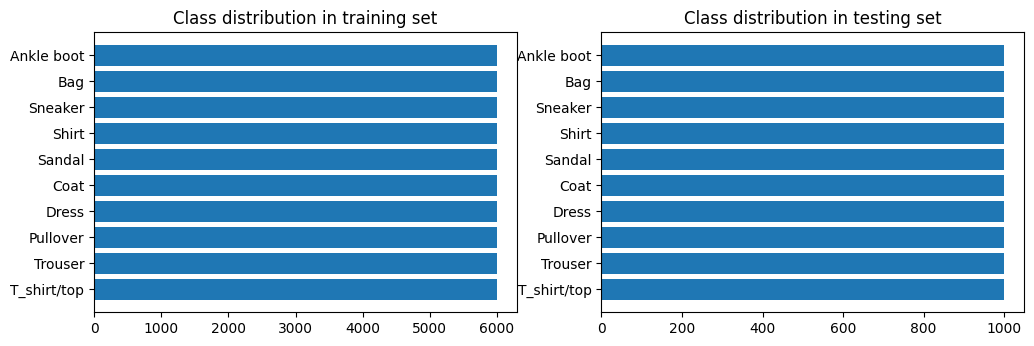

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in training set')

plt.subplot(2, 2, 2)
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in testing set')

# TRAINING THE MODEL

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
print(y_train.shape)


(48000, 784)
(48000,)


In [18]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], * (28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], * (28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], * (28, 28, 1))

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)
(12000,)


In [20]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [21]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units=10, activation='softmax'))

m:\projects\Product_Image_Classification_using_CNN\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [23]:
epochs = 50
batch_size = 512

history = cnn_model.fit(
    X_train, y_train, 
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1, 
    validation_data=(X_validate, y_validate)
)

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 91s 825ms/step - accuracy: 0.7718 - loss: 0.6946 - val_accuracy: 0.1086 - val_loss: 2.7484
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 71s 757ms/step - accuracy: 0.8676 - loss: 0.3665 - val_accuracy: 0.1141 - val_loss: 4.8620
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 69s 730ms/step - accuracy: 0.8876 - loss: 0.3044 - val_accuracy: 0.1256 - val_loss: 5.9244
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 70s 747ms/step - accuracy: 0.8994 - loss: 0.2724 - val_accuracy: 0.1256 - val_loss: 9.8693
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 67s 707ms/step - accuracy: 0.9099 - loss: 0.2453 - val_accuracy: 0.3584 - val_loss: 4.5991
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 68s 722ms/step - accuracy: 0.9163 - loss: 0.2276 - val_accuracy: 0.6715 - val_loss: 1.7082
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 70s 744ms/step - accuracy: 0.9190 - loss: 0.2179 - val_accuracy: 0.8771 - val_loss: 0.3485
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 67s 708ms/step - accuracy: 0.9260 - loss: 0.1985 - val_accu

In [31]:
cnn_model.save("cnn_fashion_mnist.h5")

Text(0.5, 1.0, 'Accuracy evolution')

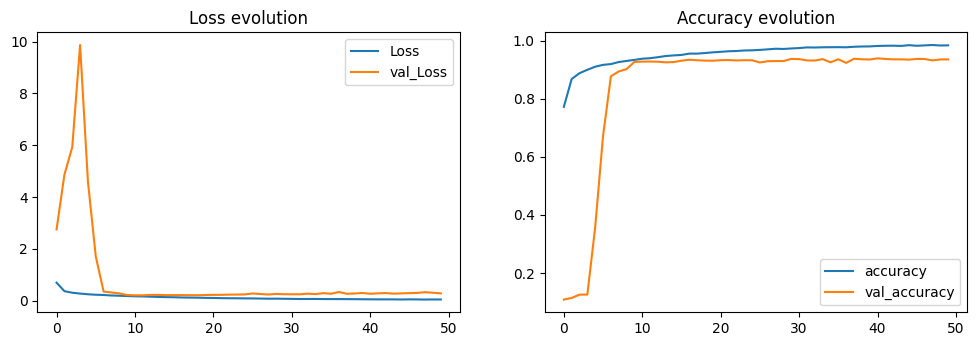

In [24]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [25]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9407 - loss: 0.2512
Test Accuracy : 0.941


In [26]:
# get the predictions for the test data
predicted_classes = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [27]:
test_img = X_test[0]
prediction = cnn_model.predict(X_test)
prediction[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


array([9.9999571e-01, 9.6443304e-19, 4.3379052e-15, 1.6237650e-09,
       1.7624878e-15, 3.5425351e-15, 4.3075665e-06, 1.2545094e-16,
       3.3781063e-15, 2.5250297e-17], dtype=float32)

In [28]:
np.argmax(prediction[0])

np.int64(0)

In [29]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.90      0.87      0.89      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.94      0.89      0.91      1000
     Class 3       0.94      0.95      0.94      1000
     Class 4       0.90      0.94      0.92      1000
     Class 5       1.00      0.98      0.99      1000
     Class 6       0.82      0.84      0.83      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

